**1. Download the Dataset and Understand the Format**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
from matplotlib.image import imread
import numpy as np
from PIL import Image
import cv2 
import os 
import glob 
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import matplotlib.pyplot as plt
from numpy import linalg as LA

**2. Generate the Data Matrix and the Label vector**

a. Convert every image into a vector of 10304 values corresponding to the image size. 

b. Stack the 400 vectors into a single Data Matrix D and generate the label
vector y.
The labels are integers from 1:40 corresponding to the subject id.


In [ ]:
images = []
for filename in sorted(os.listdir("/content/drive/MyDrive/ORL")):
    img = cv2.imread(os.path.join("/content/drive/MyDrive/ORL",filename),cv2.IMREAD_GRAYSCALE)
    if img is not None:
       ar=img.flatten()
       images.append(ar)
images
data =np.array(images)

In [ ]:
print(data)
print(str(len(data))+"x"+str(len(data[0])))

[[ 34  34  33 ...  37  40  33]
 [ 42  41  44 ...  42  43  41]
 [ 48  49  45 ...  47  46  46]
 ...
 [113 112 111 ...  87  87  89]
 [112 109 116 ...  93  88  92]
 [111 114 112 ...  88  86  92]]
400x10304


In [ ]:
vec=np.empty([400,1])
count=0;
for i in range(0,400):
  if (i%10==0):
    count+=1
  vec[i]=count

np.array(vec)

**3. Split the Dataset into Training and Test sets**

a. From the Data Matrix D400x10304 keep the odd rows for training and
the even rows for testing. This will give you 5 instances per person for
training and 5 instances per person for testing.


In [ ]:
test=[]
train=[]

for i in range(0,400):
  if (i%2==0):
    train.append(data[i])
  else:
    test.append(data[i])

train=np.array(train)  
test=np.array(test)   

b. Split the labels vector accordingly.

In [ ]:
testVec=[]
trainVec=[]

for i in range(0,400):
  if (i%2==0):
    trainVec.append(vec[i])
  else:
    testVec.append(vec[i])

trainVec=np.array(trainVec)  
testVec=np.array(testVec)  
testVec  

**4. Classification using PCA**

a. Use the pseudo code below for computing the projection matrix U.
Define the alpha = {0.8,0.85,0.9,0.95}

In [ ]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig

mean= mean(train.transpose(), axis=1)
print('Mean Vector:\n',mean,'\n')
centered_matrix = train - mean
print('Centered Matrix:\n',centered_matrix,'\n')
cov_matrix = cov(centered_matrix.transpose(),bias=True)
print('Covariance Matrix:\n',np.array(cov_matrix),'\n')
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print('Eigen Values:\n',np.array(eigen_values),'\n')
print('Eigen Vectors:\n',np.array(eigen_vectors),'\n')

Mean Vector:
 [85.885 85.77  86.37  ... 76.785 75.675 74.48 ] 

Centered Matrix:
 [[-51.885 -51.77  -53.37  ... -39.785 -35.675 -41.48 ]
 [-37.885 -36.77  -41.37  ... -29.785 -29.675 -28.48 ]
 [-46.885 -41.77  -33.37  ... -47.785 -49.675 -45.48 ]
 ...
 [ 11.115  19.23   20.63  ...  -0.785  -8.675  -0.48 ]
 [ 24.115  23.23   24.63  ...  17.215  12.325  15.52 ]
 [ 26.115  23.23   29.63  ...  16.215  12.325  17.52 ]] 

Covariance Matrix:
 [[1281.591775 1262.29855  1264.13755  ... -146.494725  -91.972375
   -23.6448  ]
 [1262.29855  1258.9671   1254.2501   ... -137.17945   -79.40475
   -17.0196  ]
 [1264.13755  1254.2501   1261.8631   ... -145.73045   -86.00975
   -25.5926  ]
 ...
 [-146.494725 -137.17945  -145.73045  ... 2204.388775 1864.505125
  1674.9482  ]
 [ -91.972375  -79.40475   -86.00975  ... 1864.505125 1923.209375
  1763.566   ]
 [ -23.6448    -17.0196    -25.5926   ... 1674.9482   1763.566
  1877.3996  ]] 

Eigen Values:
 [ 2.78325759e+06+0.00000000e+00j  2.10585053e+06+0.00000

In [ ]:
eigen_values=np.real(eigen_values)
eigen_vectors=np.real(eigen_vectors)

In [ ]:
variance_explained = []
for i in eigen_values:
     variance_explained.append(i/np.sum(eigen_values))
        
print(np.array(variance_explained))


[ 1.76003313e-01  1.33166499e-01  6.69064525e-02 ... -3.27348362e-20
  4.10205143e-20  3.74302466e-20]


In [ ]:
def PCA(variance_explained,eigen_vectors,alpha):
  sum=0
  for i in range(0,10304):
      if (sum<alpha):
        sum+=variance_explained[i]
      else:
        break  
    
  u = (eigen_vectors.T[:][:i]).T  

  return u

b. Project the training set, and test sets separately using the same
projection matrix.

In [ ]:
u1=PCA(variance_explained,eigen_vectors,0.8)
train_pca1 = train.dot(u1)
print(np.array(train_pca1))
print(str(len(train_pca1))+"x"+str(len(train_pca1[0])))

u2=PCA(variance_explained,eigen_vectors,0.85)
train_pca2 = train.dot(u2)
print(np.array(train_pca2))
print(str(len(train_pca2))+"x"+str(len(train_pca2[0])))

u3=PCA(variance_explained,eigen_vectors,0.9)
train_pca3 = train.dot(u3)
print(np.array(train_pca3))
print(str(len(train_pca3))+"x"+str(len(train_pca3[0])))

u4=PCA(variance_explained,eigen_vectors,0.95)
train_pca4 = train.dot(u4)
print(np.array(train_pca4))
print(str(len(train_pca4))+"x"+str(len(train_pca4[0])))

test_pca1 = test.dot(u1)
print(np.array(test_pca1))
print(str(len(test_pca1))+"x"+str(len(test_pca1[0])))

test_pca2 = test.dot(u2)
print(np.array(test_pca2))
print(str(len(test_pca2))+"x"+str(len(test_pca2[0])))

test_pca3 = test.dot(u3)
print(np.array(test_pca3))
print(str(len(test_pca3))+"x"+str(len(test_pca3[0])))

test_pca4 = test.dot(u4)
print(np.array(test_pca4))
print(str(len(test_pca4))+"x"+str(len(test_pca4[0])))

[[10491.0610717   7697.99222652  1499.95867364 ...  -747.69184295
    -19.8388701     40.70192656]
 [ 9444.86704417  7728.92007512  2648.56617398 ... -1367.15238635
   -188.69642269    54.94806759]
 [10620.91910078  7012.10164288  1852.96251852 ... -1243.61949612
   -587.15465775  -140.54070884]
 ...
 [ 6820.87457657  7404.54522785    98.73611467 ... -1131.11664927
   -674.29750289   300.84904841]
 [ 6689.62960563  8274.3793326     98.92666466 ... -1254.42510215
   -748.0385714    261.51857161]
 [ 6977.75805691  7653.14751623   -81.79295737 ... -1246.16301567
    -88.529011     177.95803258]]
200x36
[[ 1.04910611e+04  7.69799223e+03  1.49995867e+03 ... -3.23313956e+02
  -2.46099324e+02  4.88377863e+01]
 [ 9.44486704e+03  7.72892008e+03  2.64856617e+03 ... -1.31695075e+02
  -8.23844487e+00  1.41870372e+01]
 [ 1.06209191e+04  7.01210164e+03  1.85296252e+03 ... -5.83591014e+01
  -5.08861912e+01  2.46376891e+01]
 ...
 [ 6.82087458e+03  7.40454523e+03  9.87361147e+01 ... -3.93222433e+02
   

c. Use a simple classifier (first Nearest Neighbor to determine the class
labels).

In [ ]:
trainVec=np.ravel(trainVec)
testVec=np.ravel(testVec)

In [29]:
def firstNearestNeighbor(train,test,trainVec,testVec):
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(train)

  train = scaler.transform(train)
  test = scaler.transform(test)

  from sklearn.neighbors import KNeighborsClassifier
  classifier = KNeighborsClassifier(n_neighbors=1)
  classifier.fit(train, trainVec)

  y_pred = classifier.predict(test)

  from sklearn.metrics import classification_report, confusion_matrix
  print(confusion_matrix(testVec, y_pred))
  print(classification_report(testVec, y_pred))

d. Report Accuracy for every value of alpha separately.


In [31]:
firstNearestNeighbor(train_pca1,test_pca1,trainVec,testVec)
firstNearestNeighbor(train_pca2,test_pca2,trainVec,testVec)
firstNearestNeighbor(train_pca3,test_pca3,trainVec,testVec)
firstNearestNeighbor(train_pca4,test_pca4,trainVec,testVec)

[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 1]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 4]]
              precision    recall  f1-score   support

         1.0       0.80      0.80      0.80         5
         2.0       1.00      0.80      0.89         5
         3.0       1.00      0.80      0.89         5
         4.0       1.00      1.00      1.00         5
         5.0       1.00      1.00      1.00         5
         6.0       1.00      0.80      0.89         5
         7.0       0.71      1.00      0.83         5
         8.0       1.00      1.00      1.00         5
         9.0       0.83      1.00      0.91         5
        10.0       1.00      1.00      1.00         5
        11.0       1.00      0.80      0.89         5
        12.0       1.00      1.00      1.00         5
        13.0       1.00      1.00      1.00         5
        14.0       0.83      1.00      0.91         5
        15.0       1.00      1.00      1.00         5
        16.0   

e. Can you find a relation between alpha and classification accuracy?           
  **Ans.** yes, as the alpha increases the accuracy decreases

**6. Classifier Tuning (PCA)**

Set the number of neighbors in the K-NN classifier to 1,3,5,7.

In [32]:
def K_NN(train,test,trainVec,testVec):
  acc=[]
  ks=[]
  for i in range(1, 8,2):
    ks.append(i)
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(train, trainVec)  
    test_predict = classifier.predict(test)   
    true_predicted_count=0
    for j in range(0,200):
       if test_predict[j] ==testVec[j]:
         true_predicted_count+=1
    accuracy=true_predicted_count/200
    accuracy=accuracy*100
    print("at k = ",i,", accuracy = ", accuracy)
    acc.append((true_predicted_count/200)*100)
  plt.plot(ks, acc)
  plt.xlabel('value of k')
  plt.ylabel('accuracy') 
  plt.show()   

Plot (or tabulate) the performance measure (accuracy) against the K
value.

at k =  1 , accuracy =  90.0
at k =  3 , accuracy =  84.5
at k =  5 , accuracy =  78.5
at k =  7 , accuracy =  73.0


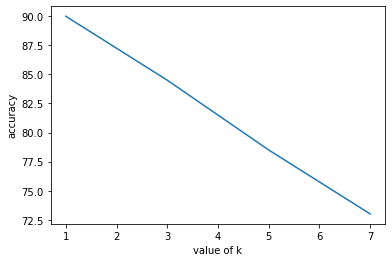

at k =  1 , accuracy =  89.5
at k =  3 , accuracy =  79.0
at k =  5 , accuracy =  72.0
at k =  7 , accuracy =  68.0


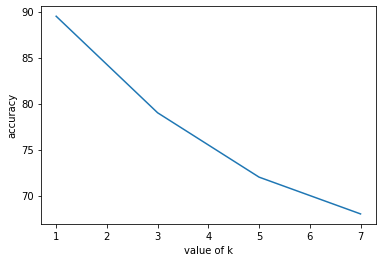

at k =  1 , accuracy =  85.0
at k =  3 , accuracy =  74.0
at k =  5 , accuracy =  64.5
at k =  7 , accuracy =  55.50000000000001


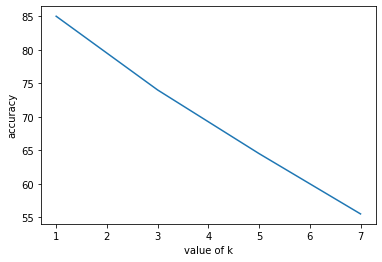

at k =  1 , accuracy =  72.5
at k =  3 , accuracy =  53.5
at k =  5 , accuracy =  43.5
at k =  7 , accuracy =  35.5


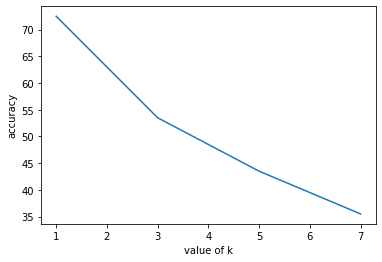

In [37]:
K_NN(train_pca1,test_pca1,trainVec,testVec)
K_NN(train_pca2,test_pca2,trainVec,testVec)
K_NN(train_pca3,test_pca3,trainVec,testVec)
K_NN(train_pca4,test_pca4,trainVec,testVec)

**7. Compare vs Non-Face Images**

In [38]:
images = []
for filename in sorted(os.listdir("/content/drive/MyDrive/NonFaces")):
    img = cv2.imread(os.path.join("/content/drive/MyDrive/NonFaces",filename),cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img, (92,112), interpolation = cv2.INTER_AREA)
    if img is not None:
       ar=img.flatten()

       images.append(ar)
#images
data =np.array(images)
data

array([[ 34,  34,  33, ...,  37,  40,  33],
       [ 42,  41,  44, ...,  42,  43,  41],
       [ 48,  49,  45, ...,  47,  46,  46],
       ...,
       [ 84,  83,  81, ..., 106, 102, 107],
       [104, 107, 104, ..., 117, 123, 116],
       [131, 137, 130, ..., 146, 148, 153]], dtype=uint8)

In [52]:
vec=np.empty([400,1])
for i in range(0,200):
  vec[i]=0
for i in range(200,400):
  vec[i]=1

In [40]:
test=[]
train=[]

for i in range(0,400):
  if (i%2==0):
    train.append(data[i])
  else:
    test.append(data[i])

train=np.array(train)  
test=np.array(test)   
train.shape

(200, 10304)

In [53]:
testVec=[]
trainVec=[]

for i in range(0,400):
  if (i%2==0):
    trainVec.append(vec[i])
  else:
    testVec.append(vec[i])

trainVec=np.array(trainVec)  
testVec=np.array(testVec)  

In [ ]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig

mean= mean(train.transpose(), axis=1)
print('Mean Vector:\n',mean,'\n')
centered_matrix = train - mean
print('Centered Matrix:\n',centered_matrix,'\n')
cov_matrix = cov(centered_matrix.transpose(),bias=True)
print('Covariance Matrix:\n',cov_matrix,'\n')
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print('Eigen Values:\n',eigen_values,'\n')
print('Eigen Vectors:\n',eigen_vectors,'\n')

In [43]:
eigen_values=np.real(eigen_values)
eigen_vectors=np.real(eigen_vectors)

In [44]:
variance_explained = []
for i in eigen_values:
     variance_explained.append(i/np.sum(eigen_values))
        
print(np.array(variance_explained))


[2.40103391e-01 1.28040427e-01 5.59072356e-02 ... 1.28133264e-20
 1.54645478e-20 2.70579131e-20]


In [ ]:
u1=PCA(variance_explained,eigen_vectors,0.8)
train_pca1 = train.dot(u1)
print(np.array(train_pca1))
print(str(len(train_pca1))+"x"+str(len(train_pca1[0])))

u2=PCA(variance_explained,eigen_vectors,0.85)
train_pca2 = train.dot(u2)
print(np.array(train_pca2))
print(str(len(train_pca2))+"x"+str(len(train_pca2[0])))

u3=PCA(variance_explained,eigen_vectors,0.9)
train_pca3 = train.dot(u3)
print(np.array(train_pca3))
print(str(len(train_pca3))+"x"+str(len(train_pca3[0])))

u4=PCA(variance_explained,eigen_vectors,0.95)
train_pca4 = train.dot(u4)
print(np.array(train_pca4))
print(str(len(train_pca4))+"x"+str(len(train_pca4[0])))

test_pca1 = test.dot(u1)
print(np.array(test_pca1))
print(str(len(test_pca1))+"x"+str(len(test_pca1[0])))

test_pca2 = test.dot(u2)
print(np.array(test_pca2))
print(str(len(test_pca2))+"x"+str(len(test_pca2[0])))

test_pca3 = test.dot(u3)
print(np.array(test_pca3))
print(str(len(test_pca3))+"x"+str(len(test_pca3[0])))

test_pca4 = test.dot(u4)
print(np.array(test_pca4))
print(str(len(test_pca4))+"x"+str(len(test_pca4[0])))

In [54]:
trainVec=np.ravel(trainVec)
testVec=np.ravel(testVec)

In [57]:
firstNearestNeighbor(train_pca1,test_pca1,trainVec,testVec)
firstNearestNeighbor(train_pca2,test_pca2,trainVec,testVec)
firstNearestNeighbor(train_pca3,test_pca3,trainVec,testVec)
firstNearestNeighbor(train_pca4,test_pca4,trainVec,testVec)

[[100   0]
 [ 17  83]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       100
         1.0       1.00      0.83      0.91       100

    accuracy                           0.92       200
   macro avg       0.93      0.92      0.91       200
weighted avg       0.93      0.92      0.91       200

[[100   0]
 [ 26  74]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       100
         1.0       1.00      0.74      0.85       100

    accuracy                           0.87       200
   macro avg       0.90      0.87      0.87       200
weighted avg       0.90      0.87      0.87       200

[[100   0]
 [ 46  54]]
              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81       100
         1.0       1.00      0.54      0.70       100

    accuracy                           0.77       200
   macro avg       0.84      0.77      0.76       200
weigh

In [66]:
newData=np.delete(data,np.s_[300:400],axis=0)
newData.shape
vec=np.empty([300,1])
count=0;
for i in range(0,200):

  vec[i]=0

i=0
for i in range(200,300):

  vec[i]=1 
print(vec.shape)
test=[]
train=[]
testVec=[]
trainVec=[]

for i in range(0,300):
  if (i%2==0):
    trainVec.append(vec[i])
  else:
    testVec.append(vec[i])

trainVec=np.array(trainVec)  
testVec=np.array(testVec)  
for i in range(0,300):
  if (i%2==0):
    train.append(newData[i])
  else:
    test.append(newData[i])
train=np.array(train)
test=np.array(test)
print(train.shape)
print(test.shape)

(300, 1)
(150, 10304)
(150, 10304)


In [68]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig

mean= mean(train.transpose(), axis=1)
print('Mean Vector:\n',mean,'\n')
centered_matrix = train - mean
print('Centered Matrix:\n',centered_matrix,'\n')
cov_matrix = cov(centered_matrix.transpose(),bias=True)
print('Covariance Matrix:\n',cov_matrix,'\n')
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print('Eigen Values:\n',eigen_values,'\n')
print('Eigen Vectors:\n',eigen_vectors,'\n')

Mean Vector:
 [108.55333333 107.26       107.44666667 ...  78.88        79.3
  80.66666667] 

Centered Matrix:
 [[-74.55333333 -73.26       -74.44666667 ... -41.88       -39.3
  -47.66666667]
 [-60.55333333 -58.26       -62.44666667 ... -31.88       -33.3
  -34.66666667]
 [-69.55333333 -63.26       -54.44666667 ... -49.88       -53.3
  -51.66666667]
 ...
 [ 42.44666667  62.74        59.55333333 ...  16.12        13.7
    3.33333333]
 [-28.55333333 -28.26       -32.44666667 ...   2.12        -7.3
  -16.66666667]
 [-36.55333333 -52.26       -29.44666667 ...  -5.88       -10.3
  -30.66666667]] 

Covariance Matrix:
 [[3088.76715556 2787.13613333 2709.17951111 ...  834.83306667
   895.62066667 1021.62444444]
 [2787.13613333 3040.24573333 2971.94386667 ...  802.0712
   859.742       996.59333333]
 [2709.17951111 2971.94386667 2969.40715556 ...  726.16693333
   781.246       919.23555556]
 ...
 [ 834.83306667  802.0712      726.16693333 ... 2040.97226667
  1979.38933333 1884.28      ]
 [ 895.

In [69]:
eigen_values=np.real(eigen_values)
eigen_vectors=np.real(eigen_vectors)

In [70]:
variance_explained = []
for i in eigen_values:
     variance_explained.append(i/np.sum(eigen_values))
        
print(np.array(variance_explained))

[ 2.42807582e-01  1.20804570e-01  6.95583837e-02 ... -5.61415400e-21
 -1.49127149e-20  8.75808181e-21]


In [71]:
u1=PCA(variance_explained,eigen_vectors,0.8)
train_pca1 = train.dot(u1)
print(np.array(train_pca1))
print(str(len(train_pca1))+"x"+str(len(train_pca1[0])))

u2=PCA(variance_explained,eigen_vectors,0.85)
train_pca2 = train.dot(u2)
print(np.array(train_pca2))
print(str(len(train_pca2))+"x"+str(len(train_pca2[0])))

u3=PCA(variance_explained,eigen_vectors,0.9)
train_pca3 = train.dot(u3)
print(np.array(train_pca3))
print(str(len(train_pca3))+"x"+str(len(train_pca3[0])))

u4=PCA(variance_explained,eigen_vectors,0.95)
train_pca4 = train.dot(u4)
print(np.array(train_pca4))
print(str(len(train_pca4))+"x"+str(len(train_pca4[0])))

test_pca1 = test.dot(u1)
print(np.array(test_pca1))
print(str(len(test_pca1))+"x"+str(len(test_pca1[0])))

test_pca2 = test.dot(u2)
print(np.array(test_pca2))
print(str(len(test_pca2))+"x"+str(len(test_pca2[0])))

test_pca3 = test.dot(u3)
print(np.array(test_pca3))
print(str(len(test_pca3))+"x"+str(len(test_pca3[0])))

test_pca4 = test.dot(u4)
print(np.array(test_pca4))
print(str(len(test_pca4))+"x"+str(len(test_pca4[0])))

[[ -6104.99539441 -10604.47515062  -4571.54337581 ...    221.76904066
     203.87899263    285.51793427]
 [ -4484.14352041 -10664.11623624  -4915.67122868 ...    176.40239483
    -780.77134106   -176.51525085]
 [ -5776.34793405 -10649.10115253  -3867.80882813 ...    268.05681969
    -868.8183499    -504.67048277]
 ...
 [ -4346.59281771  -4289.88757345  -3475.39287996 ...    113.41513792
     246.52152108   -348.20371167]
 [ -2443.75894939  -3300.01188968  -3364.4370758  ...   -107.69004326
     268.81495543   -299.76131633]
 [ -4239.55808022  -4557.90074223  -4742.19759717 ...    -78.63895278
   -1453.03752619    169.53954173]]
150x28
[[-6.10499539e+03 -1.06044752e+04 -4.57154338e+03 ...  4.03999698e+01
   7.64818448e+01 -2.12948716e+02]
 [-4.48414352e+03 -1.06641162e+04 -4.91567123e+03 ...  1.73685108e+02
   4.16027987e+02 -4.68813004e+02]
 [-5.77634793e+03 -1.06491012e+04 -3.86780883e+03 ... -1.34131651e+02
   3.60714979e+02 -5.65482119e+02]
 ...
 [-4.34659282e+03 -4.28988757e+03 -3.

In [72]:
trainVec=np.ravel(trainVec)
testVec=np.ravel(testVec)

In [73]:
firstNearestNeighbor(train_pca1,test_pca1,trainVec,testVec)
firstNearestNeighbor(train_pca2,test_pca2,trainVec,testVec)
firstNearestNeighbor(train_pca3,test_pca3,trainVec,testVec)
firstNearestNeighbor(train_pca4,test_pca4,trainVec,testVec)

[[100   0]
 [ 21  29]]
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.90       100
         1.0       1.00      0.58      0.73        50

    accuracy                           0.86       150
   macro avg       0.91      0.79      0.82       150
weighted avg       0.88      0.86      0.85       150

[[100   0]
 [ 28  22]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       100
         1.0       1.00      0.44      0.61        50

    accuracy                           0.81       150
   macro avg       0.89      0.72      0.74       150
weighted avg       0.85      0.81      0.79       150

[[100   0]
 [ 40  10]]
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83       100
         1.0       1.00      0.20      0.33        50

    accuracy                           0.73       150
   macro avg       0.86      0.60      0.58       150
weigh

**PCA1**

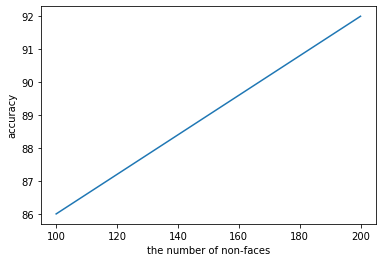

In [74]:
  ks=[100,200]
  acc=[86,92]
  plt.plot(ks, acc)
  plt.xlabel('the number of non-faces')
  plt.ylabel('accuracy') 
  plt.show() 

**PCA2**

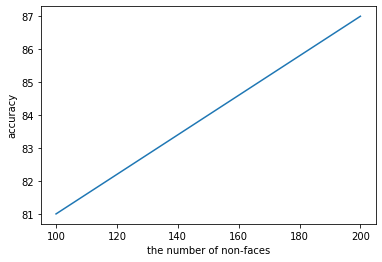

In [77]:
  ks=[100,200]
  acc=[81,87]
  plt.plot(ks, acc)
  plt.xlabel('the number of non-faces')
  plt.ylabel('accuracy') 
  plt.show() 

**PCA3**

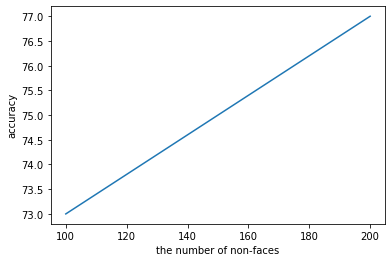

In [78]:
  ks=[100,200]
  acc=[73,77]
  plt.plot(ks, acc)
  plt.xlabel('the number of non-faces')
  plt.ylabel('accuracy') 
  plt.show() 

**PCA4**

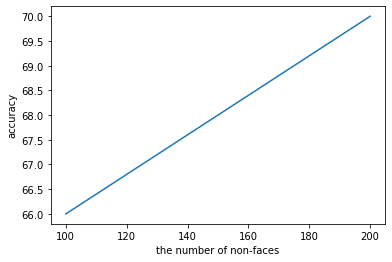

In [79]:
  ks=[100,200]
  acc=[66,70]
  plt.plot(ks, acc)
  plt.xlabel('the number of non-faces')
  plt.ylabel('accuracy') 
  plt.show() 